In [1]:
DATA = 'F:\\brain-tumor-target-2\\train'

import pathlib
import pydicom
import numpy as np
from random import randint
from matplotlib import pyplot as plt

dataPath = pathlib.Path(DATA)

test = pathlib.Path('F:\\rsna-miccai-brain-tumor-radiogenomic-classification\\train')
testInstance = list(test.iterdir())[81]
testType = list(testInstance.iterdir())[1]

instance = list(dataPath.iterdir())[0]
instanceType = list(instance.iterdir())[1]



In [2]:
testType.name

'T1w'

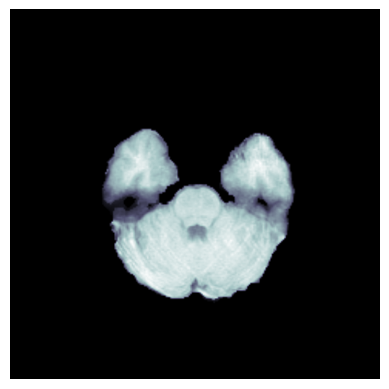

In [3]:
int = randint(0, len(list(instanceType.iterdir())) - 1)
dcm = pydicom.dcmread(str(list(instanceType.iterdir())[int]))

image = dcm.pixel_array
plt.imshow(image, cmap=plt.cm.bone)
plt.axis('off')
plt.show()

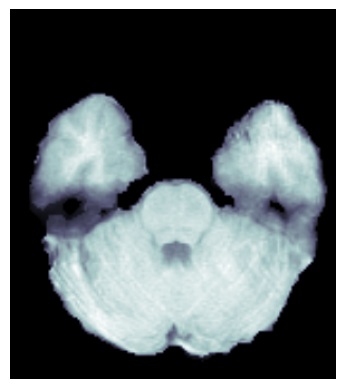

In [4]:
leftBuffer = 110
rightBuffer = image.shape[1] - 110

upBuffer = 90
downBuffer = image.shape[0] - 90

cutimage = image[upBuffer:downBuffer, leftBuffer:rightBuffer]
plt.imshow(cutimage, cmap=plt.cm.bone)
plt.axis('off')
plt.show()


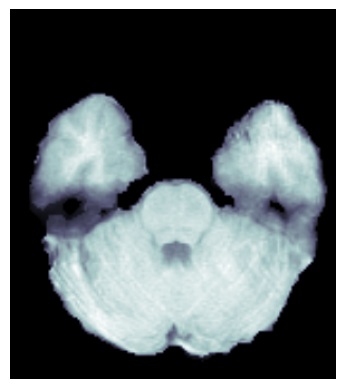

In [6]:
plt.imshow(cutimage, cmap=plt.cm.bone)  
plt.axis('off')
plt.show()

In [5]:
# no visible difference in normalization or scaling

from sklearn.preprocessing import normalize
from sklearn.preprocessing import minmax_scale
from pipeline import Crop

newimg = (normalize(cutimage.reshape(-1, cutimage.shape[-1]))).reshape(cutimage.shape)

newimg = Crop(newimg)

print(newimg)
plt.imshow(newimg, cmap=plt.cm.bone)
plt.axis('off')
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
0


IndexError: tuple index out of range